In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set plotting style
sns.set_theme(style="whitegrid")

### Load Data


In [4]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv')

# Display the first few rows
print("Dataset Head:")
print(df.head())

# Display the shape of the dataset
print(f"\nDataset Shape: {df.shape}")

Dataset Head:
                                       clean_comment  category
0   family mormon have never tried explain them t...         1
1  buddhism has very much lot compatible with chr...         1
2  seriously don say thing first all they won get...        -1
3  what you have learned yours and only yours wha...         0
4  for your own benefit you may want read living ...         1

Dataset Shape: (37249, 2)


## 2 . Data Quality Check & Preprocessing

### 2.1 Check Data Types and Missing Values

In [5]:
print("Dataset Overview :\n")
df.info()

Dataset Overview :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [6]:
print("\nMissing Values:")
df.isnull().sum()



Missing Values:


clean_comment    100
category           0
dtype: int64

In [7]:
df[df['clean_comment'].isna()]

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


### 2.2 Handle Missing and Duplicate Values

In [8]:
print("\nDuplicated Values (before removal):")
print(df.duplicated().sum())

# Drop rows with NaN values
df.dropna(inplace=True)

# Drop duplicate rows
df.drop_duplicates(inplace=True)

print(f"\nNew Dataset Shape after dropping NaNs and duplicates: {df.shape}")


Duplicated Values (before removal):
449

New Dataset Shape after dropping NaNs and duplicates: (36799, 2)


### 2.3 Handle Empty or Whitespace-Only Comments

In [9]:
# Identify comments containing only whitespace (including newlines)
empty_comments = df[(df['clean_comment'].str.strip() == '')]
print("Empty or Whitespace-only Comments (before removal):")
print(empty_comments)

# Remove empty/whitespace-only comments
df = df[~(df['clean_comment'].str.strip() == '')]

print(f"\nNew Dataset Shape after removing empty comments: {df.shape}")

Empty or Whitespace-only Comments (before removal):
                clean_comment  category
181                                   0
4432                       \n         0
10592                                 0
16173                                 0
32149  \n                             0
34959                                 0



New Dataset Shape after removing empty comments: (36793, 2)


### 2.4 Text Normalization: Lowercasing and Whitespace Stripping

In [10]:
# Convert the 'clean_comment' column to lowercase
df['clean_comment'] = df['clean_comment'].str.lower()

# Remove trailing and leading whitespaces from the 'clean_comment' column
df['clean_comment'] = df['clean_comment'].str.strip()

# Verify the transformation by checking for any remaining trailing/leading whitespaces
remaining_whitespace = df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' ')).sum()
print(f"\nComments with remaining leading/trailing whitespace: {remaining_whitespace}")

df.head()


Comments with remaining leading/trailing whitespace: 0


,clean_comment,category
0,family mormon have never tried explain them th...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


### 2.5 Inspect and Clean Newline Characters

In [11]:
# Identify comments containing new line characters
comments_with_newline = df[df['clean_comment'].str.contains('\n', regex=False)]
print("Comments containing '\\n' before cleaning:")
print(comments_with_newline.head())

# Remove new line characters from the 'clean_comment' column
df['clean_comment'] = df['clean_comment'].str.replace('\n', ' ', regex=True)

# Verify the transformation by checking for any remaining new lines
comments_with_newline_remaining = df[df['clean_comment'].str.contains('\n', regex=False)]
print(f"\nComments with remaining '\\n' after cleaning: {comments_with_newline_remaining.shape[0]}")

Comments containing '\n' before cleaning:
                                          clean_comment  category
448   what missing jpg\nand why this brilliant edit ...         1
781   india has been ruined congress and populist sc...        -1
847   like aap for its stand corruption and making p...        -1
871   reduced trade\ndeficit stronger rupee aren the...         0
1354  amsa press conference australian maritime safe...         1

Comments with remaining '\n' after cleaning: 0


## 3. Exploratory Data Analysis


### 3.1 Target Variable Distribution (category)

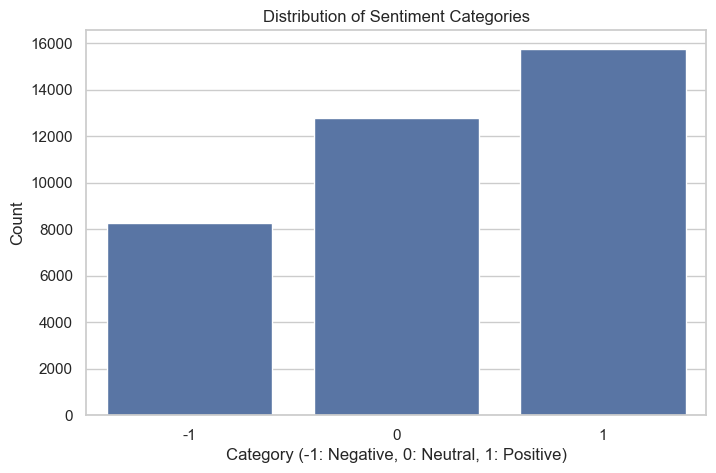

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="category")
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Category (-1: Negative, 0: Neutral, 1: Positive)')
plt.ylabel('Count')
plt.show()

In [13]:
print("Frequency Distribution of Sentiments:")
print(df['category'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

Frequency Distribution of Sentiments:
category
 1    42.86%
 0    34.71%
-1    22.42%
Name: proportion, dtype: object


### 3.2 Comment Length Analysis (word_count)

In [14]:
#add word count column
df['word_count'] = df['clean_comment'].apply(lambda x: len(x.split()))
df.sample(5)
     

,clean_comment,category,word_count
21480,how his team worked this need put heat congres...,1,46
612,gujarati modiji has done miracle last years ha...,1,30
36451,chowkidaar modi has really high profile clients,1,7
34644,akela sabka vote jayega you been warned,0,7
9437,name tags wow what bunch fucking dweebs,-1,7


In [15]:
print("Word Count Descriptive Statistics:")
print(df['word_count'].describe().round(2))

Word Count Descriptive Statistics:
count    36793.00
mean        29.67
std         56.79
min          1.00
25%          6.00
50%         13.00
75%         30.00
max       1307.00
Name: word_count, dtype: float64


### 3.3 Word Count Distribution (KDE Plot)

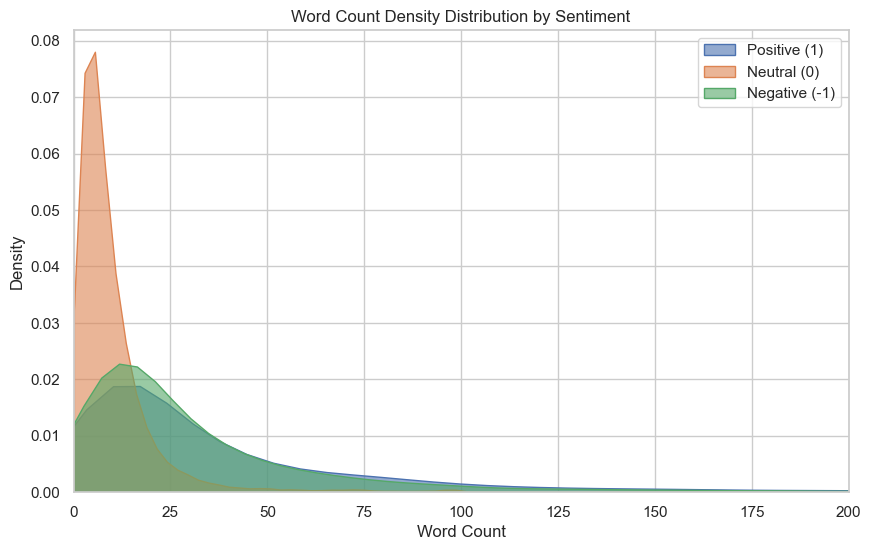

In [16]:
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for each category
sns.kdeplot(df[df['category'] == 1]['word_count'], label='Positive (1)', fill=True, alpha=0.6)
sns.kdeplot(df[df['category'] == 0]['word_count'], label='Neutral (0)', fill=True, alpha=0.6)
sns.kdeplot(df[df['category'] == -1]['word_count'], label='Negative (-1)', fill=True, alpha=0.6)

# Add title and labels
plt.title('Word Count Density Distribution by Sentiment')
plt.xlabel('Word Count')
plt.ylabel('Density')
plt.xlim(0, 200) # Limiting x-axis for better visual clarity of the main body
plt.legend()
plt.show()

### 3.4 Word Count Distribution (Box Plot)

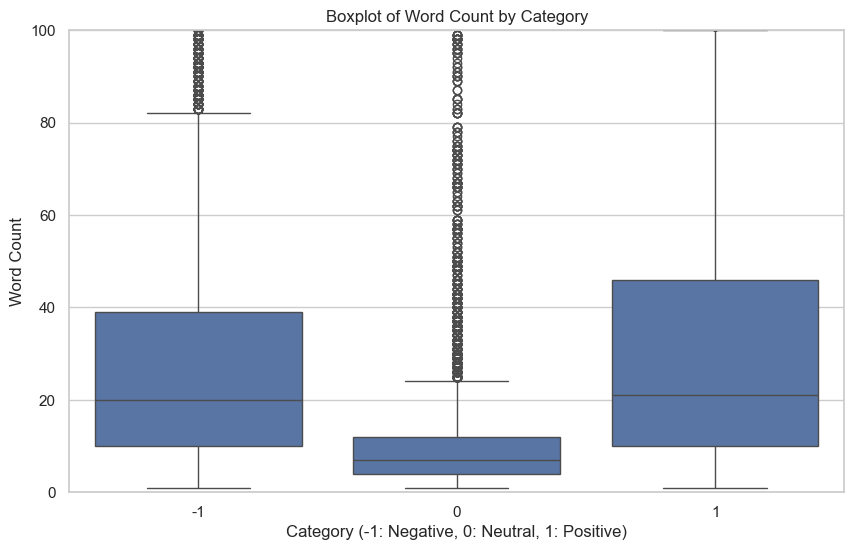

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='category', y='word_count')
plt.title('Boxplot of Word Count by Category')
plt.xlabel('Category (-1: Negative, 0: Neutral, 1: Positive)')
plt.ylabel('Word Count')
plt.ylim(0, 100) # Limiting y-axis to see the main distribution and common outliers better
plt.show()

### 3.5 Median Word Counts

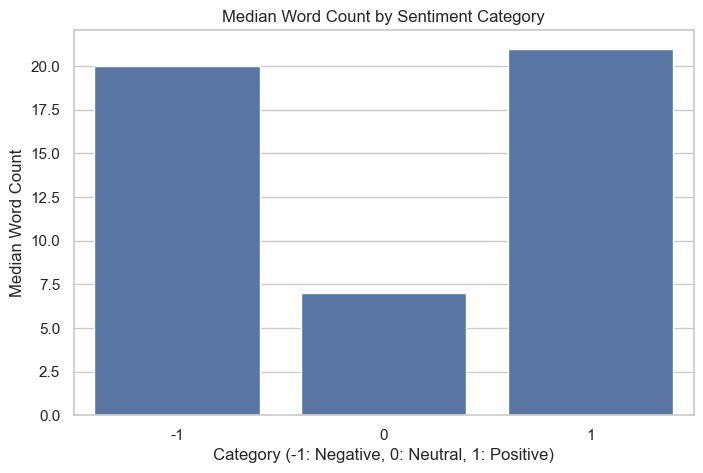

In [18]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='category', y='word_count', estimator='median', errorbar=None)
plt.title('Median Word Count by Sentiment Category')
plt.xlabel('Category (-1: Negative, 0: Neutral, 1: Positive)')
plt.ylabel('Median Word Count')
plt.show()

In [19]:
!pip install nltk

In [20]:
from nltk.corpus import stopwords

# Download NLTK stopwords if not already downloaded
import nltk
nltk.download('stopwords')

# Define the list of English stopwords
stop_words = set(stopwords.words('english'))

# Create a new column 'num_stop_words' by counting the number of stopwords in each comment
df['num_stop_words'] = df['clean_comment'].apply(lambda x: len([word for word in x.split() if word in stop_words]))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
df.sample(5)

,clean_comment,category,word_count,num_stop_words
15732,this exactly the reason why bjp must the next ...,1,29,12
25234,supreme leader doesn take holidays takes vacat...,0,7,1
20225,srh for strengths very very good bowling final...,1,49,7
7319,you got totally wrong the gotra marriage hindu...,-1,31,10
8423,standard scoring need hou minn nyj,0,6,0


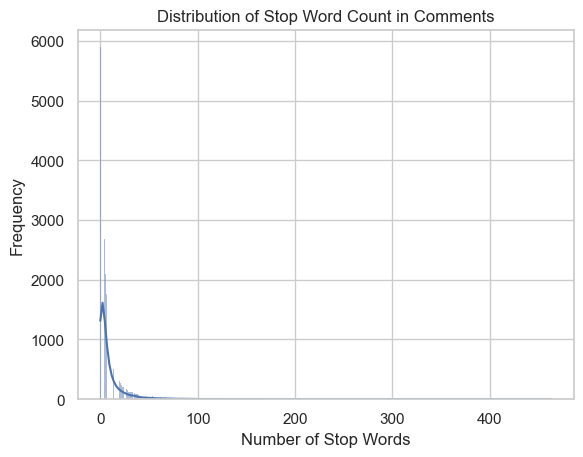

In [22]:
sns.histplot(df['num_stop_words'], kde=True)
plt.title('Distribution of Stop Word Count in Comments')
plt.xlabel('Number of Stop Words')
plt.ylabel('Frequency')
plt.show()


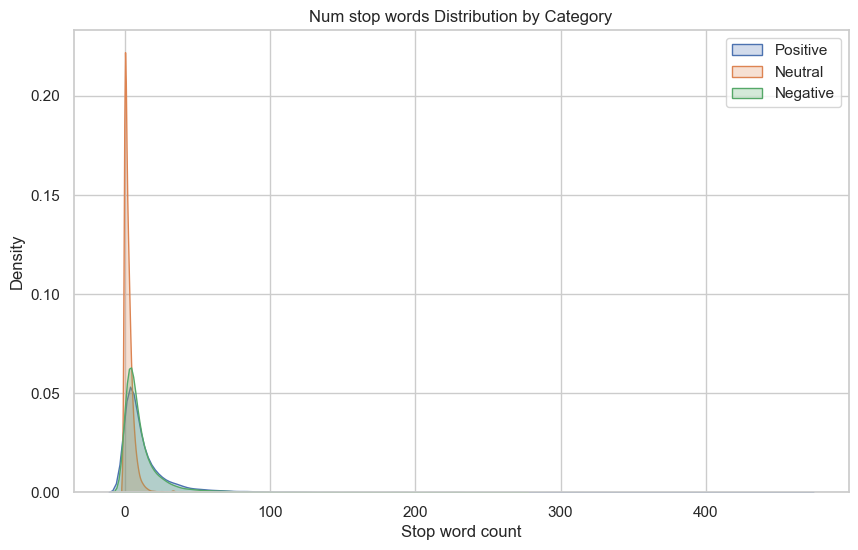

In [23]:

# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for category 1
sns.kdeplot(df[df['category'] == 1]['num_stop_words'], label='Positive', fill=True)

# Plot KDE for category 0
sns.kdeplot(df[df['category'] == 0]['num_stop_words'], label='Neutral', fill=True)

# Plot KDE for category -1
sns.kdeplot(df[df['category'] == -1]['num_stop_words'], label='Negative', fill=True)

# Add title and labels
plt.title('Num stop words Distribution by Category')
plt.xlabel('Stop word count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

<Axes: xlabel='category', ylabel='num_stop_words'>

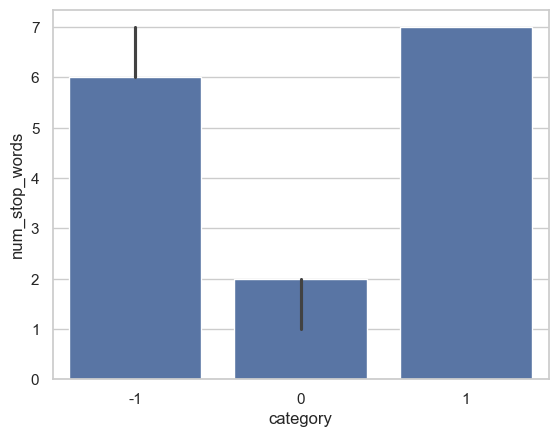

In [24]:
# median word counts among sentiments

sns.barplot(df,x='category',y='num_stop_words',estimator='median')
     

C:\Users\DELL\AppData\Local\Temp\ipykernel_8020\2260100725.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')


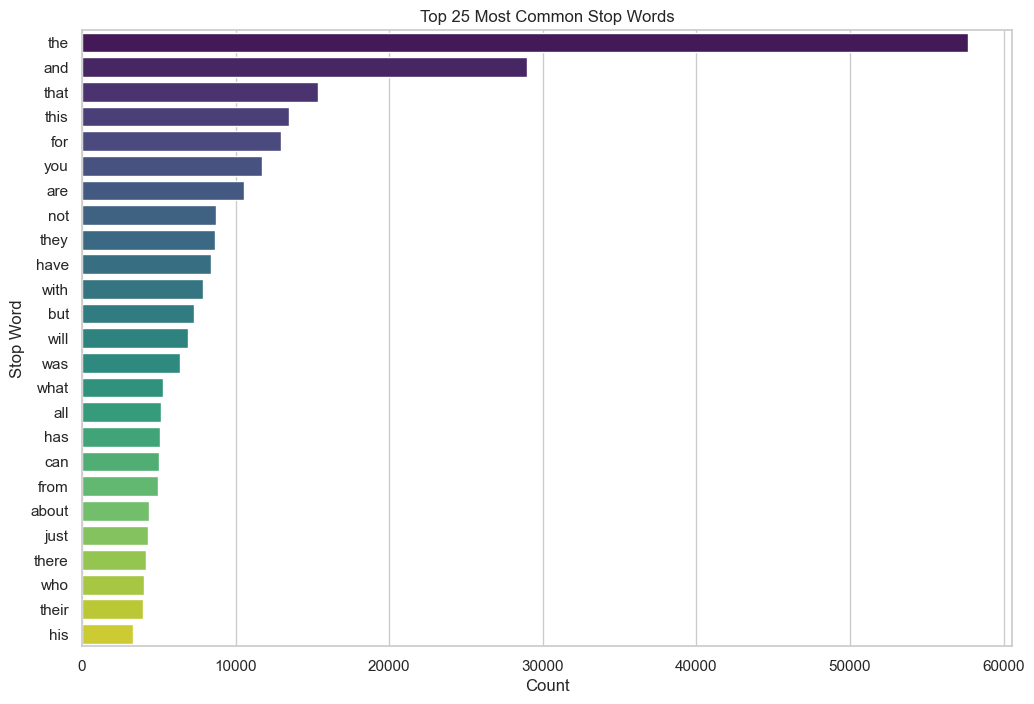

In [25]:

# Create a frequency distribution of stop words in the 'clean_comment' column
from collections import Counter

# Extract all stop words from the comments using the previously defined 'common_stopwords'
all_stop_words = [word for comment in df['clean_comment'] for word in comment.split() if word in stop_words]

# Count the most common stop words
most_common_stop_words = Counter(all_stop_words).most_common(25)

# Convert the most common stop words to a DataFrame for plotting
top_25_df = pd.DataFrame(most_common_stop_words, columns=['stop_word', 'count'])

# Create the barplot for the top 25 most common stop words
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')
plt.title('Top 25 Most Common Stop Words')
plt.xlabel('Count')
plt.ylabel('Stop Word')
plt.show()

In [26]:
df['num_chars'] = df['clean_comment'].apply(len)

df.head()

,clean_comment,category,word_count,num_stop_words,num_chars
0,family mormon have never tried explain them th...,1,39,13,259
1,buddhism has very much lot compatible with chr...,1,196,59,1268
2,seriously don say thing first all they won get...,-1,86,40,459
3,what you have learned yours and only yours wha...,0,29,15,167
4,for your own benefit you may want read living ...,1,112,45,690


In [27]:
df['num_chars'].describe()

count    36793.000000
mean       181.852798
std        359.702163
min          1.000000
25%         38.000000
50%         80.000000
75%        184.000000
max       8664.000000
Name: num_chars, dtype: float64

In [28]:
from collections import Counter

# Combine all comments into one large string
all_text = ' '.join(df['clean_comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)


     

In [29]:
char_frequency_df['character'].values

array([' ', 'e', 't', ..., '呗', 'ഥ', '杨'], dtype=object)

In [30]:

char_frequency_df.tail(50)

,character,frequency
1336,回,1
1337,毫,1
1322,足,1
1323,够,1
1324,假,1
1325,才,1
1326,叫,1
1327,醒,1
1328,妖,1
1329,婆,1


In [31]:

# Create a new column 'num_punctuation_chars' to count punctuation characters in each comment
df['num_punctuation_chars'] = df['clean_comment'].apply(
    lambda x: sum([1 for char in x if char in '.,!?;:"\'()[]{}-'])
)

df.sample(5)

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
20776,yeah because fuck freedom speech,-1,5,1,32,0
10000,team 5ppr start allen robinson thomas rawls de...,0,13,0,89,0
32620,chowkidaar chor hai,0,3,0,19,0
27783,don need india for favoured nation,0,6,2,34,0
28215,don know what believe the moment both indian n...,1,28,10,175,0


In [32]:
df['num_punctuation_chars'].describe()

count    36793.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: num_punctuation_chars, dtype: float64

C:\Users\DELL\AppData\Local\Temp\ipykernel_8020\54124301.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')


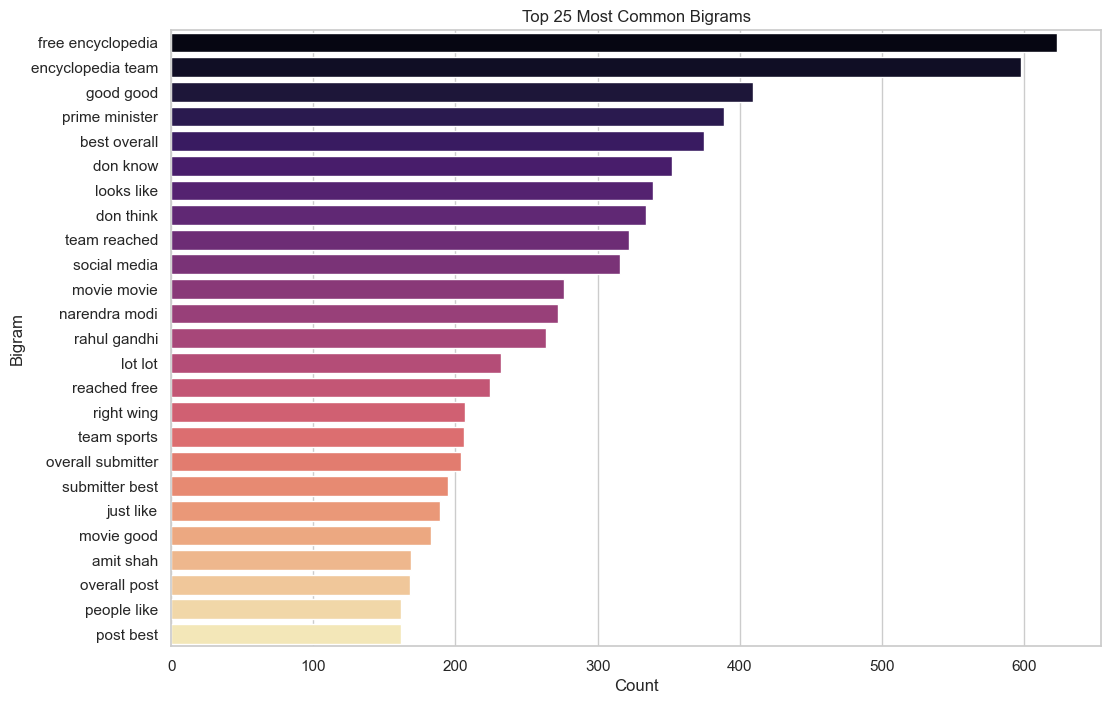

In [33]:

from sklearn.feature_extraction.text import CountVectorizer

# Create a function to extract the top 25 bigrams
def get_top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 bigrams
top_25_bigrams = get_top_ngrams(df['clean_comment'], 25)

# Convert the bigrams into a DataFrame for plotting
top_25_bigrams_df = pd.DataFrame(top_25_bigrams, columns=['bigram', 'count'])

# Plot the countplot for the top 25 bigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')
plt.title('Top 25 Most Common Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8020\3795620872.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm')


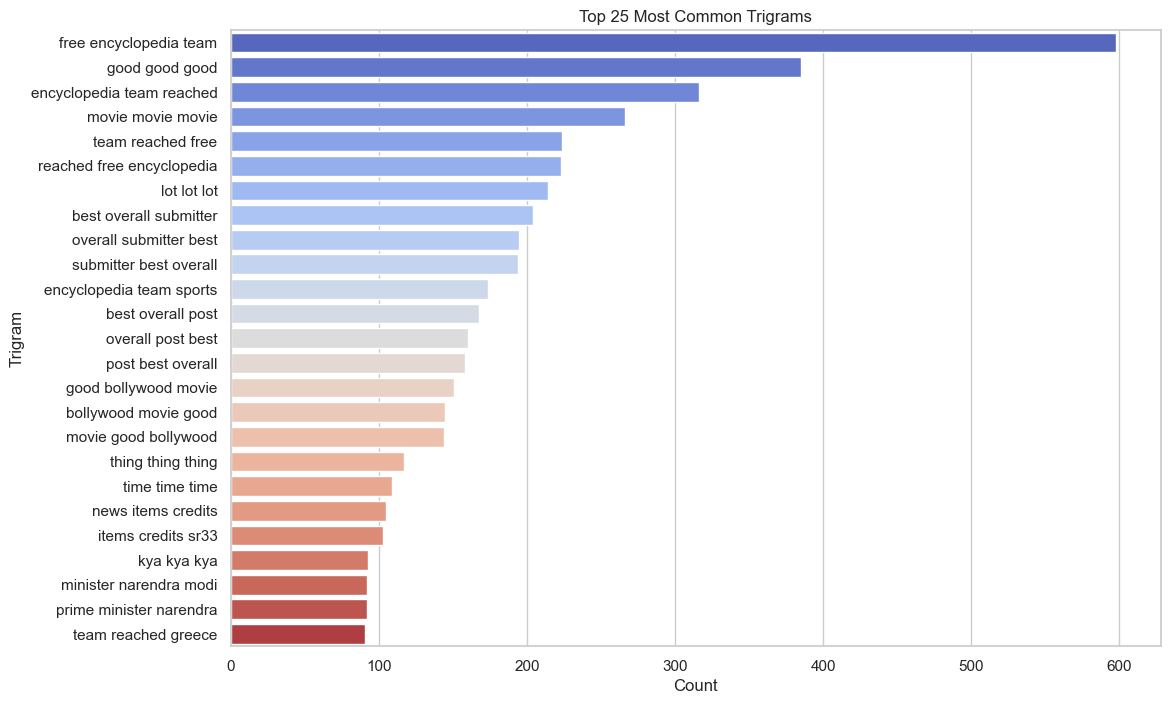

In [34]:

# Create a function to extract the top 25 trigrams
def get_top_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 trigrams
top_25_trigrams = get_top_trigrams(df['clean_comment'], 25)

# Convert the trigrams into a DataFrame for plotting
top_25_trigrams_df = pd.DataFrame(top_25_trigrams, columns=['trigram', 'count'])

# Plot the countplot for the top 25 trigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm')
plt.title('Top 25 Most Common Trigrams')
plt.xlabel('Count')
plt.ylabel('Trigram')
plt.show()

In [35]:
# Remove non-English characters from the 'clean_comment' column
# Keeping only standard English letters, digits, and common punctuation
import re

df['clean_comment'] = df['clean_comment'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s!?.,]', '', str(x)))

In [36]:

all_text = ' '.join(df['clean_comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)

char_frequency_df

,character,frequency
6,,1091592
12,e,666610
13,t,491287
1,a,481134
3,i,401388
9,n,388465
7,o,379908
17,s,355279
8,r,331425
10,h,296748


In [37]:

df.head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon have never tried explain them th...,1,39,13,259,0
1,buddhism has very much lot compatible with chr...,1,196,59,1268,0
2,seriously don say thing first all they won get...,-1,86,40,459,0
3,what you have learned yours and only yours wha...,0,29,15,167,0
4,for your own benefit you may want read living ...,1,112,45,690,0


In [38]:

from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

# Define the lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the 'clean_comment_no_stopwords' column
df['clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)

df.head()
     

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...


,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon have never tried explain them th...,1,39,13,259,0
1,buddhism ha very much lot compatible with chri...,1,196,59,1268,0
2,seriously don say thing first all they won get...,-1,86,40,459,0
3,what you have learned yours and only yours wha...,0,29,15,167,0
4,for your own benefit you may want read living ...,1,112,45,690,0


In [40]:
!pip install wordcloud

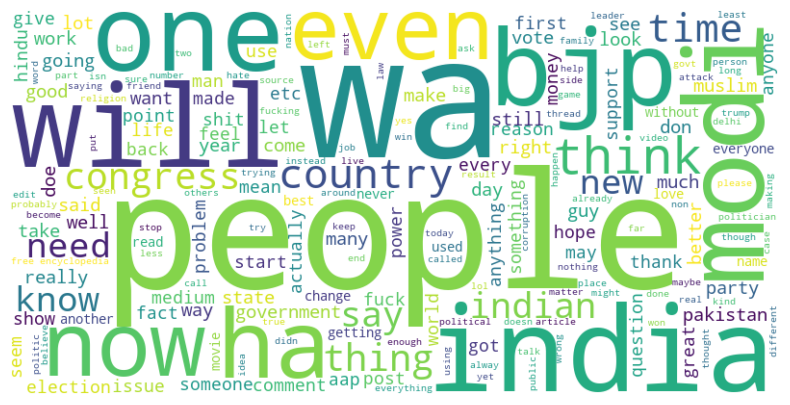

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df['clean_comment'])

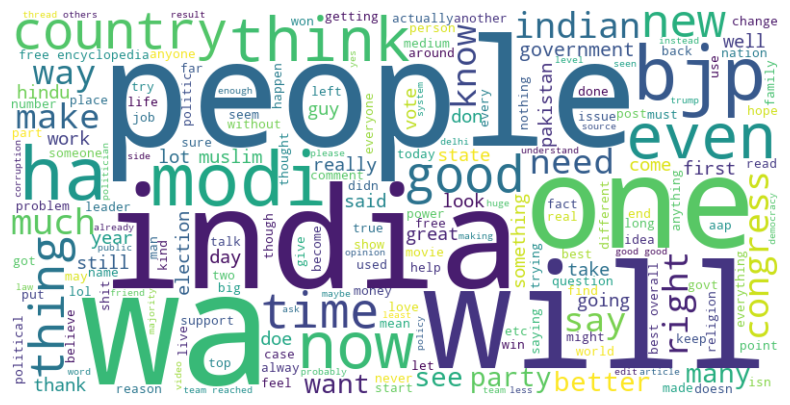

In [42]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['category'] == 1]['clean_comment'])

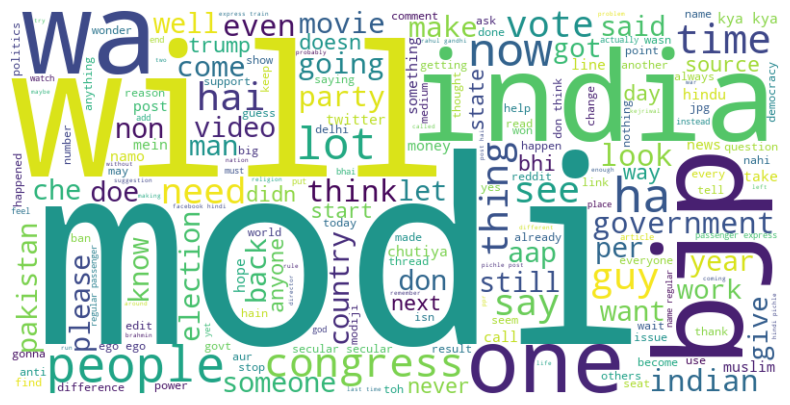

In [43]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['category'] == 0]['clean_comment'])

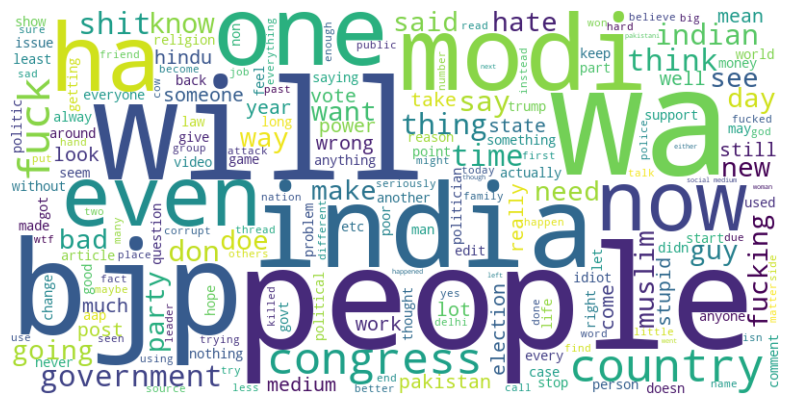

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['category'] == -1]['clean_comment'])

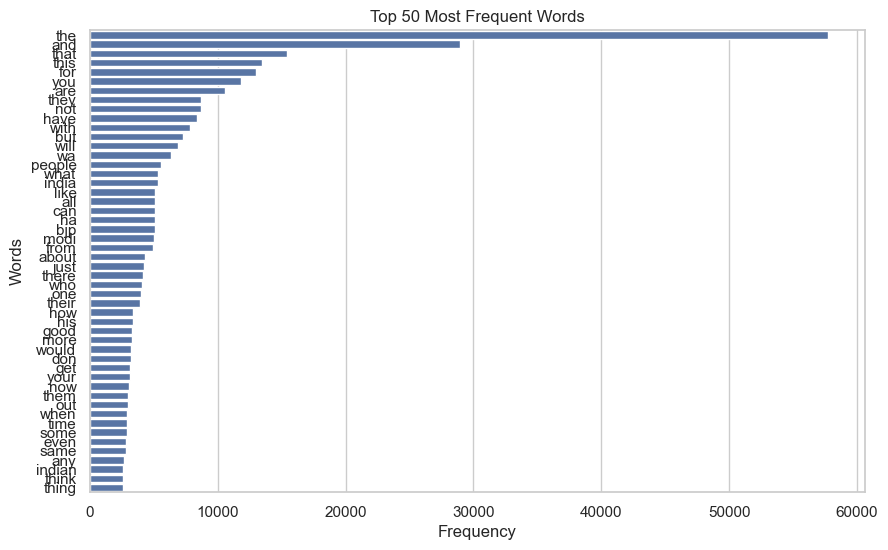

In [45]:
def plot_top_n_words(df, n=20):
    """Plot the top N most frequent words in the dataset."""
    # Flatten all words in the content column
    words = ' '.join(df['clean_comment']).split()

    # Get the top N most common words
    counter = Counter(words)
    most_common_words = counter.most_common(n)

    # Split the words and their counts for plotting
    words, counts = zip(*most_common_words)

    # Plot the top N words
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(f'Top {n} Most Frequent Words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Example usage
plot_top_n_words(df, n=50)

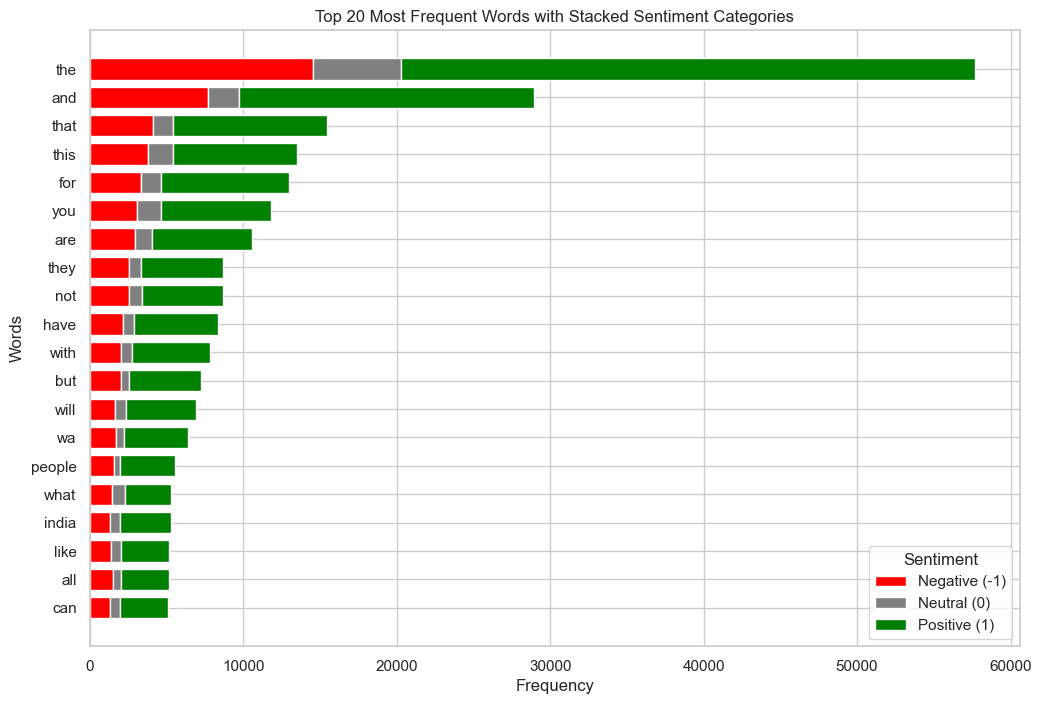

In [46]:

def plot_top_n_words_by_category(df, n=20, start=0):
    """Plot the top N most frequent words in the dataset with stacked hue based on sentiment category."""
    # Flatten all words in the content column and count their occurrences by category
    word_category_counts = {}

    for idx, row in df.iterrows():
        words = row['clean_comment'].split()
        category = row['category']  # Assuming 'category' column exists for -1, 0, 1 labels

        for word in words:
            if word not in word_category_counts:
                word_category_counts[word] = { -1: 0, 0: 0, 1: 0 }  # Initialize counts for each sentiment category

            # Increment the count for the corresponding sentiment category
            word_category_counts[word][category] += 1

    # Get total counts across all categories for each word
    total_word_counts = {word: sum(counts.values()) for word, counts in word_category_counts.items()}

    # Get the top N most frequent words across all categories
    most_common_words = sorted(total_word_counts.items(), key=lambda x: x[1], reverse=True)[start:start+n]
    top_words = [word for word, _ in most_common_words]

    # Prepare data for plotting
    word_labels = top_words
    negative_counts = [word_category_counts[word][-1] for word in top_words]
    neutral_counts = [word_category_counts[word][0] for word in top_words]
    positive_counts = [word_category_counts[word][1] for word in top_words]

    # Plot the stacked bar chart
    plt.figure(figsize=(12, 8))
    bar_width = 0.75

    # Plot negative, neutral, and positive counts in a stacked manner
    plt.barh(word_labels, negative_counts, color='red', label='Negative (-1)', height=bar_width)
    plt.barh(word_labels, neutral_counts, left=negative_counts, color='gray', label='Neutral (0)', height=bar_width)
    plt.barh(word_labels, positive_counts, left=[i+j for i,j in zip(negative_counts, neutral_counts)], color='green', label='Positive (1)', height=bar_width)

    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top {n} Most Frequent Words with Stacked Sentiment Categories')
    plt.legend(title='Sentiment', loc='lower right')
    plt.gca().invert_yaxis()  # Invert y-axis to show the highest frequency at the top
    plt.show()



plot_top_n_words_by_category(df, n=20)